### Treinando o Modelo
Treinando a máquina com os dados coletados

In [1]:
# Definição de variáveis

data_path = "../data/data.npy"
labels_path = "../data/labels.npy"



Total: 708 imgs


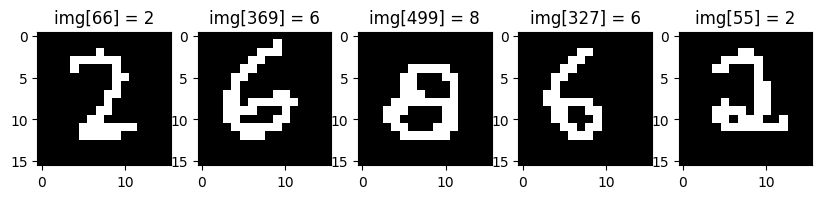

In [21]:
# Carregando os dados

import numpy as np
import matplotlib.pyplot as plt

data = np.load(data_path)
labels = np.load(labels_path)

print(f"Total: {len(data)} imgs")

fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for ax in axes:
    random_img = np.random.randint(len(data))
    ax.imshow(data[random_img], cmap='gray')
    ax.set_title("img[{}] = {}".format(random_img, labels[random_img]))
plt.show()

In [112]:
# Treinando a máquina

from sklearn import svm
from sklearn.model_selection import train_test_split

data = np.reshape(data, (-1, 256)) # deixa as imagens em vetor unidimensional

train_X, test_X, train_y, test_y = train_test_split(data, labels, test_size=0.1)

model = svm.SVC(class_weight='balanced', C=100)

model.fit(train_X, train_y)
model.score(test_X, test_y)


0.8591549295774648

In [115]:
# Treina a máquina com todos os dados e salva para ser usada
import pickle

model.fit(data, labels)

with open("../adivinha.pkl", 'wb') as f:
    pickle.dump(model, f)
